In [1]:
import pandas as pd
import os

In [2]:
import pandas as pd 
dataset_Train = pd.read_csv(r"C:\Users\ASUS\Desktop\diabetes-data\diabetes.csv") 
import pandas as pd 
dataset_Test = pd.read_csv(r"C:\Users\ASUS\Desktop\diabetes-data\diabetes.csv") 

In [3]:
dataset_Train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
dataset_Test.drop('Outcome', axis=1, inplace=True)

In [5]:
dataset_Test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
dataset_Test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [7]:
dataset_Train['Pregnancies'] = dataset_Train['Pregnancies']/17
dataset_Train['Glucose'] = dataset_Train['Glucose']/199
dataset_Train['BloodPressure'] = dataset_Train['BloodPressure']/122
dataset_Train['SkinThickness'] = dataset_Train['SkinThickness']/99
dataset_Train['Insulin'] = dataset_Train['Insulin']/849
dataset_Train['BMI'] = dataset_Train['BMI']/67.10
dataset_Train['DiabetesPedigreeFunction'] = dataset_Train['DiabetesPedigreeFunction']/2.42
dataset_Train['Age'] = dataset_Train['Age']/81
dataset_Train['Outcome'] = dataset_Train['Outcome']/1.00



dataset_Test['Pregnancies'] = dataset_Test['Pregnancies']/17
dataset_Test['Glucose'] = dataset_Test['Glucose']/199
dataset_Test['BloodPressure'] = dataset_Test['BloodPressure']/122
dataset_Test['SkinThickness'] = dataset_Test['SkinThickness']/99
dataset_Test['Insulin'] = dataset_Test['Insulin']/849
dataset_Test['BMI'] = dataset_Test['BMI']/67.10
dataset_Test['DiabetesPedigreeFunction'] = dataset_Test['DiabetesPedigreeFunction']/2.42
dataset_Test['Age'] = dataset_Test['Age']/81

In [8]:
dataset_Train['Glucose']= dataset_Train['Glucose'].astype(int)

In [9]:
X=dataset_Train.loc[:, dataset_Train.columns != 'Outcome']
y=dataset_Train['Outcome'].values

In [10]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0,0.590164,0.353535,0.000000,0.500745,0.259091,0.617284
1,0.058824,0,0.540984,0.292929,0.000000,0.396423,0.145041,0.382716
2,0.470588,0,0.524590,0.000000,0.000000,0.347243,0.277686,0.395062
3,0.058824,0,0.540984,0.232323,0.110718,0.418778,0.069008,0.259259
4,0.000000,0,0.327869,0.353535,0.197880,0.642325,0.945455,0.407407


In [11]:
import numpy as np
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import utils
from sklearn.preprocessing import StandardScaler

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [13]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.6493506493506493

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state  =0)

In [15]:
tree = tree.DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(tree, X, y, cv= k_fold, n_jobs=1, scoring=scoring)
print(score)

[0.5974026  0.7012987  0.67532468 0.58441558 0.53246753 0.63636364
 0.68831169 0.62337662 0.63157895 0.60526316]


In [16]:
import numpy as np
(np.mean(score))

0.6275803144224198

In [17]:
knn = KNeighborsClassifier(n_neighbors = 2)
scoring = 'accuracy'
score = cross_val_score(knn, X, y, cv= k_fold, n_jobs=2, scoring=scoring)
print(score)

[0.64935065 0.75324675 0.66233766 0.64935065 0.66233766 0.61038961
 0.72727273 0.63636364 0.67105263 0.77631579]


In [18]:
(np.mean(score))

0.6798017771701983

In [19]:
k_scores = []
for i in range(90,100) :   
    knn = KNeighborsClassifier(n_neighbors = i)
    scoring = 'accuracy'
    score = cross_val_score(knn, X, y, cv = k_fold, scoring = scoring)  
    k_scores.append(np.mean(score))
print(k_scores)

[0.6784176349965823, 0.681015037593985, 0.6797334244702665, 0.6823308270676691, 0.6797334244702665, 0.682347915242652, 0.6797334244702665, 0.6810321257689679, 0.6810321257689679, 0.6810321257689679]


Text(0, 0.5, 'Cross-Validated Accuracy')

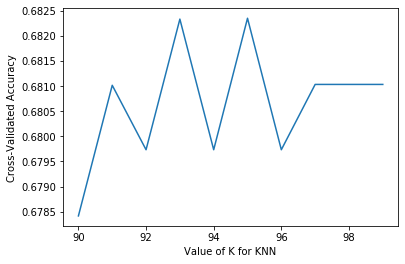

In [20]:
import matplotlib.pyplot as plt
k_range = range(90,100)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [21]:
knn_best = KNeighborsClassifier(n_neighbors = 5)

scoring = 'accuracy'

score = cross_val_score(knn_best, X, y, cv = k_fold, n_jobs = 1, scoring = scoring)

print(score)

[0.68831169 0.84415584 0.63636364 0.66233766 0.7012987  0.67532468
 0.66233766 0.63636364 0.64473684 0.71052632]


In [22]:
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
X_train = sc_x.fit_transform(X_train)  
X_test = sc_x.transform(X_test) 
  
print (X_train[0:10, :]) 

[[-1.1328442  -0.04038962  0.3472366   2.23367325  0.15367661  2.72776337
   0.90749721 -0.69845742]
 [-0.54212969 -0.04038962 -3.48608463  0.14155993 -0.68068042 -0.36979162
   0.95037384 -0.69845742]
 [-1.1328442  -0.04038962 -0.0562709  -0.42901643  0.55416798 -0.89242436
  -0.97907465 -1.03881683]
 [ 1.82072836 -0.04038962 -3.48608463 -1.31657965 -0.68068042  0.44602533
  -1.0066382  -0.35809801]
 [-1.1328442  -0.04038962 -0.25802464  1.02912316 -0.14669192  0.22932395
   0.14490566 -0.95372697]
 [-0.83748694 -0.04038962 -0.15714777  0.52194417 -0.68068042 -0.66297584
  -0.34205039 -0.18791831]
 [-1.1328442  -0.04038962  0.54899035  1.02912316  1.07146933  0.57349673
   1.04531496 -0.86863712]
 [ 0.63929934 -0.04038962  0.44811348  1.28271265  0.48741941  1.82271644
   0.33172528 -0.52827771]
 [-1.1328442  -0.04038962  1.35600535 -1.31657965 -0.68068042 -1.18560858
  -0.61462327 -1.03881683]
 [ 2.41144288 -0.04038962  0.14548285  0.64873892 -0.68068042 -0.2678145
  -0.50743169  1.0

In [23]:
from sklearn.linear_model import LogisticRegression 
classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
import pickle
pickle.dump(classifier, open("model.pkl",'wb'))
model= pickle.load(open("model.pkl",'rb'))

In [131]:
prediction = classifier.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, prediction))

Accuracy :  0.6753246753246753


In [133]:
prediction = classifier.predict(dataset_Test)

In [137]:
submission = pd.DataFrame({"Id": dataset_Test["DiabetesPedigreeFunction"], "Outcome": prediction})
submission['Id']= submission['Id']
submission['Outcome'] = submission['Outcome'].astype(str)
submission.to_csv("simple.csv", index =False)
submission.head()

,Id,Outcome
0,0.259091,1.0
1,0.145041,0.0
2,0.277686,0.0
3,0.069008,0.0
4,0.945455,1.0
